In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_excel('master_data.xlsx')
df.columns

Index(['dice_AC_L1', 'hd_AC_L1', 'assd_AC_L1', 'vol_AC_L1', 'vol_err_AC_L1',
       'dice_AC_L5', 'hd_AC_L5', 'assd_AC_L5', 'vol_AC_L5', 'vol_err_AC_L5',
       'dice_AC_L10', 'hd_AC_L10', 'assd_AC_L10', 'vol_AC_L10',
       'vol_err_AC_L10', 'dice_DICE', 'hd_DICE', 'assd_DICE', 'vol_DICE',
       'vol_err_DICE', 'dice_DOF', 'hd_DOF', 'assd_DOF', 'vol_DOF',
       'vol_err_DOF', 'dice_wxent', 'hd_wxent', 'assd_wxent', 'vol_wxent',
       'vol_err_wxent', 'dice_xent', 'hd_xent', 'assd_xent', 'vol_xent',
       'vol_err_xent', 'phase', 'struc', 'filename'],
      dtype='object')

In [2]:
df_test = df[['vol_AC_L10', 'vol_err_AC_L10']]
# df_test

In [3]:
vol = 'vol_AC_L1'
vol_err = 'vol_err_AC_L1'
for struc_name in ['LV', 'RV', 'Myo']:
    lv = df.loc[df['struc'] == struc_name]

    ED_vol = np.array(lv.loc[lv['phase'] == 'ED'][vol])
    ES_vol = np.array(lv.loc[(lv['phase'] == 'ES')][vol])
    EF_pred = (ED_vol - ES_vol) / ED_vol

    ED_vol_gt = ED_vol - np.array(lv.loc[lv['phase'] == 'ED'][vol_err])
    ES_vol_gt = ES_vol - np.array(lv.loc[(lv['phase'] == 'ES')][vol_err])

    EF_gt = (ED_vol_gt - ES_vol_gt) / ED_vol_gt
    
    ED_corr = stats.pearsonr(ED_vol, ED_vol_gt)
    ES_corr = stats.pearsonr(ES_vol, ES_vol_gt)
    
    LV_EF_corr = stats.pearsonr(EF_pred, EF_gt)
#     print('{}, EF corr: {}\n\n'.format(struc_name, round(LV_EF_corr[0], 3)))
#     print('{}, EDV corr: {}\n\n'.format(struc_name, round(ED_corr[0], 3)))
#     print('{}, ESV corr: {}\n\n'.format(struc_name, round(ES_corr[0], 3)))

In [4]:
# ED_corr

In [5]:
# LV_EF_corr

In [6]:
# ED_vol_gt

In [7]:
# ED_vol

In [8]:
# ES_vol

In [9]:
# ES_vol_gt

In [10]:
# EF_pred

In [11]:
# EF_gt

In [12]:
import pingouin as pg

# ax = pg.plot_blandaltman(EF_pred, EF_gt)

C:\Users\raybi\Anaconda3\envs\tgpu112\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


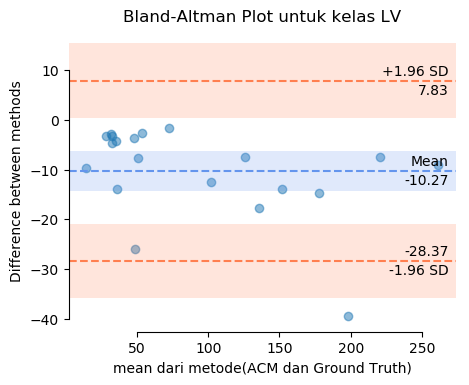

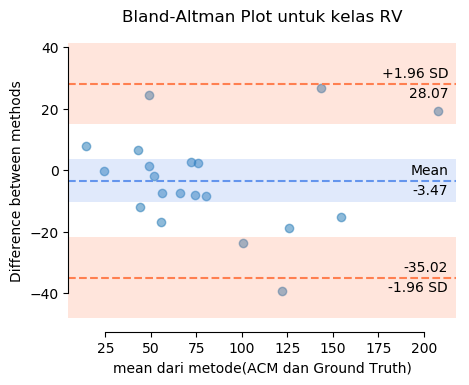

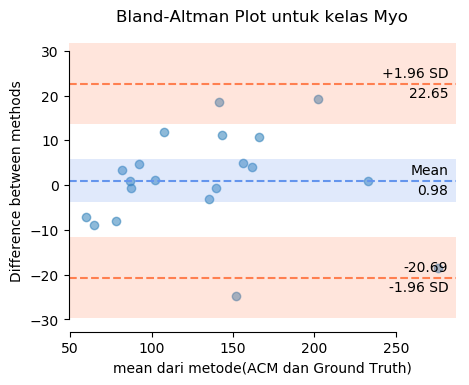

In [16]:
import pingouin as pg
import matplotlib.pyplot as plt 

for struc_name in ['LV', 'RV', 'Myo']:
    lv = df.loc[df['struc'] == struc_name]

    ED_vol = np.array(lv.loc[lv['phase'] == 'ED'][vol])
    ES_vol = np.array(lv.loc[(lv['phase'] == 'ES')][vol])
    EF_pred = (ED_vol - ES_vol) / ED_vol

    ED_vol_gt = ED_vol - np.array(lv.loc[lv['phase'] == 'ED'][vol_err])
    ES_vol_gt = ES_vol - np.array(lv.loc[(lv['phase'] == 'ES')][vol_err])

    EF_gt = (ED_vol_gt - ES_vol_gt) / ED_vol_gt
    
    ED_corr = stats.pearsonr(ED_vol, ED_vol_gt)
    ES_corr = stats.pearsonr(ES_vol, ES_vol_gt)
    
   
    ax = pg.plot_blandaltman(ES_vol, ES_vol_gt)
    plt.title('Bland-Altman Plot untuk kelas {}'.format(struc_name))
    plt.xlabel('mean dari metode(ACM dan Ground Truth)')

In [14]:
dfnow = df.loc[:, ['dice_AC_L10', 'hd_AC_L10', 'assd_AC_L10', 'vol_AC_L10', 'phase', 'struc']]


for s_idx, struc_name in enumerate(['LV', 'RV', 'Myo']):
    for measure in ['dice_AC_L10', 'hd_AC_L10', 'assd_AC_L10']:

        print('{} ({}) '.format(measure, struc_name))

        dat = dfnow.loc[df['struc'] == struc_name]

        if measure == 'dice_AC_L10':
            print(' & {:.3f} ({:.3f}) '.format(np.mean(dat[measure]), np.std(dat[measure])))
        else:
            print(' & {:.2f} ({:.2f}) '.format(np.mean(dat[measure]), np.std(dat[measure])))


dice_AC_L10 (LV) 
 & 0.946 (0.036) 
hd_AC_L10 (LV) 
 & 7.45 (7.31) 
assd_AC_L10 (LV) 
 & 0.51 (0.69) 
dice_AC_L10 (RV) 
 & 0.871 (0.096) 
hd_AC_L10 (RV) 
 & 13.33 (5.63) 
assd_AC_L10 (RV) 
 & 1.37 (1.14) 
dice_AC_L10 (Myo) 
 & 0.879 (0.037) 
hd_AC_L10 (Myo) 
 & 9.46 (5.82) 
assd_AC_L10 (Myo) 
 & 0.57 (0.26) 


In [15]:
for struc in [3,1,2]:

    gt_binary = (gt == struc) * 1
    pred_binary = (pred == struc) * 1

    volpred = pred_binary.sum() * np.prod(zooms) / 1000.
    volgt = gt_binary.sum() * np.prod(zooms) / 1000.

    vol_list.append(volpred)
    vol_err_list.append(volpred - volgt)

NameError: name 'gt' is not defined